In [ ]:
#HERE I MADE A MODEL FOR 1ST 3 CUSTOMER ID 
#AND I USED VGG16 SO ACCURACY IS LESS . WE CAN USE SOME POWERFUL MODEL ALSO BUT MY SYSTEM DOESNOT HAVE GPU SO I CANT ABLE TO TRAIN
#I CREATED GUI ALSO USING STREAMLIT THAT SAMPLE VIDEO I ATTACHED IN THIS MAIL

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from sklearn.model_selection import train_test_split
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt



In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split


base_dir = r"C:\Users\ADMIN\Downloads\signature\CEDAR\CEDAR\1"
new_base_dir = r"C:\Users\ADMIN\Downloads\signature2\1"


train_dir = os.path.join(new_base_dir, "train")
test_dir = os.path.join(new_base_dir, "test")


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


for folder in ["fake", "real"]:
    os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, folder), exist_ok=True)


def move_images_to_folders(images, labels, directory):
    for img, label in zip(images, labels):
        if label == 0:
            category = "fake"
        elif label == 1:
            category = "real"
        else:
            continue
        
       
        dest_folder = os.path.join(directory, category)
        
       
        shutil.copy(img, dest_folder)


image_paths = [os.path.join(base_dir, file) for file in os.listdir(base_dir)]


labels = [0 if file.startswith("f") else 1 for file in os.listdir(base_dir)]


X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)


move_images_to_folders(X_train, y_train, train_dir)
move_images_to_folders(X_test, y_test, test_dir)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('C:/Users/ADMIN/Downloads/signature2/1/train',
                                                 target_size=(224, 224),
                                                 batch_size=2,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('C:/Users/ADMIN/Downloads/signature2/1/test',
                                            target_size=(224, 224),
                                            batch_size=2,
                                            class_mode='categorical')


Found 38 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [24]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


for layer in vgg.layers:
  layer.trainable = False
  

  


x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 378ms/step - accuracy: 1.0000 - loss: 2.8167e-05 - val_accuracy: 0.6250 - val_loss: 2.2752


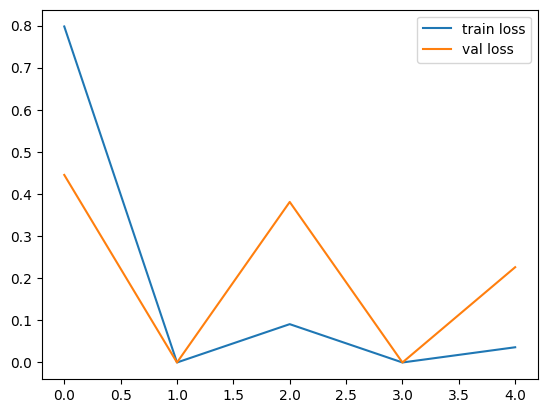

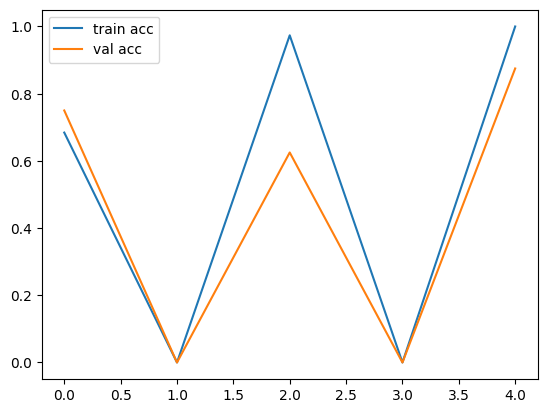

<Figure size 640x480 with 0 Axes>

In [10]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')

plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [28]:
import tensorflow as tf

from keras.models import load_model

model.save('sign_for_id1_new_model_2.h5')


In [36]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model_path = "C:/Users/ADMIN/sign_for_id1_new_model_2.h5"
model = load_model(model_path)


img_path = "C:/Users/ADMIN/Downloads/test/original_1_21.png"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predictions = model.predict(x)

# Threshold for class decision
threshold = 0.5


if predictions[0][0] > threshold:
    class_label = 'Real'
    confidence = predictions[0][0] * 100
else:
    class_label = 'Fake'
    confidence = (1 - predictions[0][0]) * 100

# Print class label and confidence percentage
print(f"Class: {class_label}")
print(f"Confidence: {confidence:.2f}%")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Class: Fake
Confidence: 100.00%
